# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Arga Bathara Dipoyono
- **Email:** argadipoyono@gmail.com
- **ID Dicoding:** rgabtrd

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang dipinjam?
- Bagaimana hubungan antara suhu dengan jumlah sepeda yang dipinjam?
- Bagaimana perkembangan tren jumlah sepeda yang dipinjam? 

## Import Semua Packages/Library yang Digunakan

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [249]:
# Load dataset day
day = pd.read_csv("data/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset ini mencatat jumlah peminjaman sepeda setiap hari berserta faktor-faktor yang mempengaruhinya.

- Dataset ini memiliki 16 kolom yaitu:
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [250]:
# Memeriksa informasi dataset
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [251]:
# Membuat fungsi untuk memeriksa missing value
def checkMissingValue(data):
    for column in data.columns:
        missingValue = data[column].isnull().sum()
        print(f"Missing value kolom {column}: {missingValue}")

# Memeriksa missing value pada dataset
checkMissingValue(day)

Missing value kolom instant: 0
Missing value kolom dteday: 0
Missing value kolom season: 0
Missing value kolom yr: 0
Missing value kolom mnth: 0
Missing value kolom holiday: 0
Missing value kolom weekday: 0
Missing value kolom workingday: 0
Missing value kolom weathersit: 0
Missing value kolom temp: 0
Missing value kolom atemp: 0
Missing value kolom hum: 0
Missing value kolom windspeed: 0
Missing value kolom casual: 0
Missing value kolom registered: 0
Missing value kolom cnt: 0


In [252]:
# Membuat fungsi untuk memeriksa data terduplikat
def checkDuplicateData(data):
    print(f"Jumlah duplikasi data: ", data.duplicated().sum())
    
# Memeriksa data terduplikat pada dataset
checkDuplicateData(day)

Jumlah duplikasi data:  0


In [253]:
# Membuat fungsi untuk memeriksa outlier menggunakan IQR method
def checkOutlier(data):
    for column in data.select_dtypes(include=['number']):
        q25 = np.percentile(data[column], 25) 
        q75 = np.percentile(data[column], 75)  
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum = q25 - cut_off 
        maximum = q75 + cut_off 
        
        outliers = data[(data[column] < minimum) | (data[column] > maximum)][column]

        print(f"Outlier kolom {column}: {outliers.count()}")
        
# Memeriksa outlier pada dataset
checkOutlier(day)

Outlier kolom instant: 0
Outlier kolom season: 0
Outlier kolom yr: 0
Outlier kolom mnth: 0
Outlier kolom holiday: 21
Outlier kolom weekday: 0
Outlier kolom workingday: 0
Outlier kolom weathersit: 0
Outlier kolom temp: 0
Outlier kolom atemp: 0
Outlier kolom hum: 2
Outlier kolom windspeed: 13
Outlier kolom casual: 44
Outlier kolom registered: 0
Outlier kolom cnt: 0


**Insight:**
- Kolom dteday pada dataset memiliki tipe data yang kurang tepat. Langkah yang harus diambil adalah untuk menganti tipe data kolom tersebut menjadi tipe data datetime pada tahap cleaning data. 

- Tidak ditemukan missing value pada dataset. Oleh karena itu, tidak perlu melakukan metode cleaning untuk mengatasi missing value.

- Tidak ditemukan duplikasi pada dataset. Oleh karena itu, tidak perlu melakukan metode cleaning untuk mengatasi duplikasi pada dataset.

- Outlier ditemukan pada beberapa kolom: 
    - Outlier pada kolom holiday dapat disebabkan oleh adanya data libur yang sangat berbeda.
    - Outlier pada kolom hum dan windspeed dapat disebabkan oleh kondisi cuaca ekstrem yang jarang terjadi.
    - Outlier pada kolom casual dapat disebabkan oleh adanya penggunaan yang unik oleh pengguna tidak terdaftar.

### Cleaning Data

In [254]:
# Mengubah tipe data
day["dteday"] = pd.to_datetime(day["dteday"])

# Memeriksa perubahan tipe data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data kolom dteday telah berhasil diperbaiki. Proses cleaning telah selesai.

## Exploratory Data Analysis (EDA)

### Explore dataset day

In [255]:
# Mengecek rangkuman parameter statistik kolom numerik
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [256]:
# Mengecek korelasi kolom pada dataset
day.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [257]:
# Menghitung nilai max, min, mean, dan std untuk cnt pada setiap kondisi cuaca
day.groupby(by="weathersit").agg({
     'cnt': ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

In [258]:
# Menghitung total jumlah sepeda yang dipinjam untuk setiap kondisi cuaca
day.groupby(by="weathersit").cnt.sum()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

In [259]:
# Menghitung nilai max, min, mean, dan std untuk cnt pada setiap nilai suhu
day.groupby(by="temp").agg({
    'cnt': ["max", "min", "mean", "std"]
})

cnt                  
           max   min    mean std
temp                            
0.059130   981   981   981.0 NaN
0.096522   986   986   986.0 NaN
0.097391  1416  1416  1416.0 NaN
0.107500  2368  2368  2368.0 NaN
0.127500  1529  1529  1529.0 NaN
...        ...   ...     ...  ..
0.834167  5463  5463  5463.0 NaN
0.838333  3846  3846  3846.0 NaN
0.848333  3387  3387  3387.0 NaN
0.849167  3285  3285  3285.0 NaN
0.861667  4840  4840  4840.0 NaN

[499 rows x 4 columns]

In [260]:
# Menghitung total jumlah sepeda yang dipinjam untuk setiap suhu
day.groupby(by="temp").cnt.sum()

temp
0.059130     981
0.096522     986
0.097391    1416
0.107500    2368
0.127500    1529
            ... 
0.834167    5463
0.838333    3846
0.848333    3387
0.849167    3285
0.861667    4840
Name: cnt, Length: 499, dtype: int64

In [261]:
# Menghitung nilai max, min, mean, dan std untuk cnt pada periode setiap bulan
day.groupby(by=day['dteday'].dt.to_period('M')).agg({
    'cnt':["max", "min", "mean", "std"]
})

cnt                                
          max   min         mean          std
dteday                                       
2011-01  1985   431  1231.903226   372.432665
2011-02  2927  1005  1721.964286   398.508839
2011-03  3239   605  2065.967742   550.971716
2011-04  5312   795  3162.333333  1042.093593
2011-05  5805  2633  4381.322581   572.927883
2011-06  5515  3767  4783.733333   444.447812
2011-07  6043  3285  4559.387097   680.090762
2011-08  5895  1115  4409.387097   809.852401
2011-09  5423  1842  4247.266667   965.377251
2011-10  5511   627  3984.225806  1103.481844
2011-11  4486  1495  3405.566667   788.249290
2011-12  3940   705  2816.870968   958.763187
2012-01  4521  1301  3120.774194   872.852134
2012-02  5062  1529  3556.448276   870.724640
2012-03  8362  3194  5318.548387  1251.162682
2012-04  7460  1027  5807.466667  1308.938916
2012-05  8294  2843  6318.225806  1078.403997
2012-06  8120  4127  6761.000000   954.204995
2012-07  8173  4459  6567.967742   867.183736
2012-08  7865  4549  6919.451613   794.059017
2012-09  8714  4073  7285.766667   979.160925
2012-10  8156    22  6414.225806  1941.819400
2012-11  6852  2277  5088.800000  1129.731198
2012-12  6606   441  3990.741935  1803.227864

In [262]:
# Menghitung total jumlah sepeda yang dipinjam untuk bulan
day.groupby(by=day['dteday'].dt.to_period('M')).cnt.sum()

dteday
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: cnt, dtype: int64

**Insight:**
- Kondisi cuaca berpengaruh pada jumlah sepeda yang dipinjam

- Terdapat korelasi antara suhu dengan jumlah sepeda yang dipinjam

- Terdapat pergerakan pada tren jumlah sepeda yang dipinjam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang dipinjam?

In [263]:
# Melakukan mapping untuk mengubah kode kondisi cuaca menjadi nama kondisi cuaca
weatherMap = {
    1: "Cerah/Sedikit Berawan",     # Clear, Few clouds, Partly cloudy, Partly cloudy
    2: "Kabut/Berawan",             # Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: "Sedikit Hujan/Bersalju"     # Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
}

day["weathersit"] = day["weathersit"].map(weatherMap)

In [264]:
# Memeriksa hasil mapping
day["weathersit"].head()

0            Kabut/Berawan
1            Kabut/Berawan
2    Cerah/Sedikit Berawan
3    Cerah/Sedikit Berawan
4    Cerah/Sedikit Berawan
Name: weathersit, dtype: object

C:\Users\victus\AppData\Local\Temp\ipykernel_13052\3017207736.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barChart = sns.barplot(


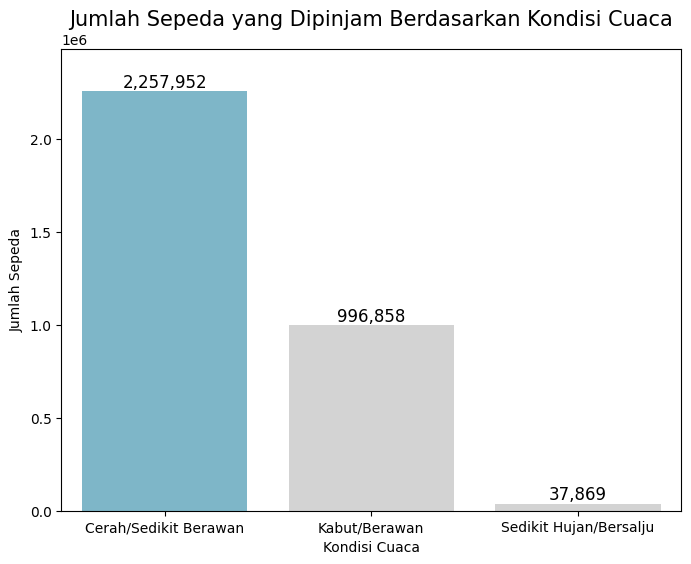

In [265]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_df = day.groupby(by="weathersit").cnt.sum().reset_index()
weather_df.rename(columns={
    "weathersit": "kondisi_cuaca",
    "cnt": "jumlah_sepeda"
}, inplace=True)

# Warna untuk setiap batang
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

# Membuat barplot
plt.figure(figsize=(8,6))
barChart = sns.barplot(
    x="kondisi_cuaca",
    y="jumlah_sepeda",
    data=weather_df.sort_values(by="jumlah_sepeda", ascending=False),
    palette=colors,
)

# Menambahkan angka di atas setiap batang
for bar in barChart.patches:
    barChart.annotate(f'{bar.get_height():,.0f}',  
                      (bar.get_x() + bar.get_width() / 2., bar.get_height()),  
                      ha='center', va='bottom', fontsize=12, color='black')

# Menyesuaikan batas atas sumbu y 
barChart.set_ylim(0, max(weather_df["jumlah_sepeda"]) * 1.1)

# Menambahkan keterangan
plt.title("Jumlah Sepeda yang Dipinjam Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Sepeda")
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara suhu dengan jumlah sepeda yang dipinjam?

C:\Users\victus\AppData\Local\Temp\ipykernel_13052\4099511497.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


Text(0, 0.5, 'Jumlah Sepeda')

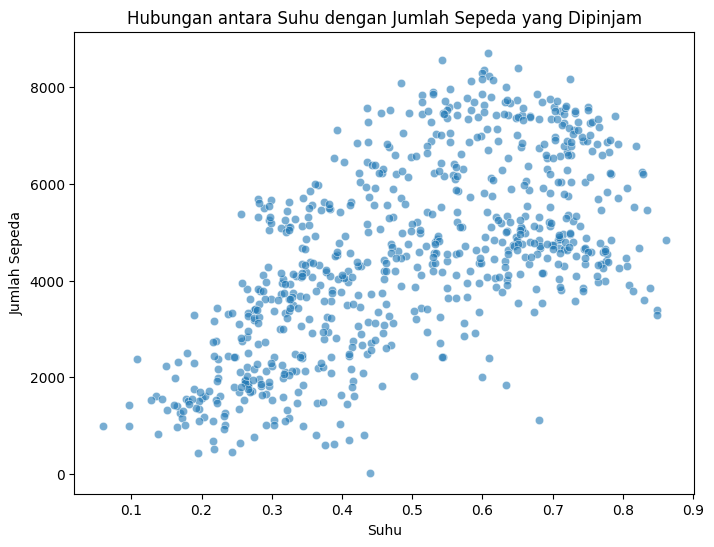

In [266]:
# Membuat scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="temp", 
    y="cnt", 
    data=day, 
    alpha=0.6, 
    palette="Set1"  
)

# Menambahkan keterangan
plt.title("Hubungan antara Suhu dengan Jumlah Sepeda yang Dipinjam")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Sepeda")

### Pertanyaan 3: Bagaimana perkembangan tren jumlah sepeda yang dipinjam? 

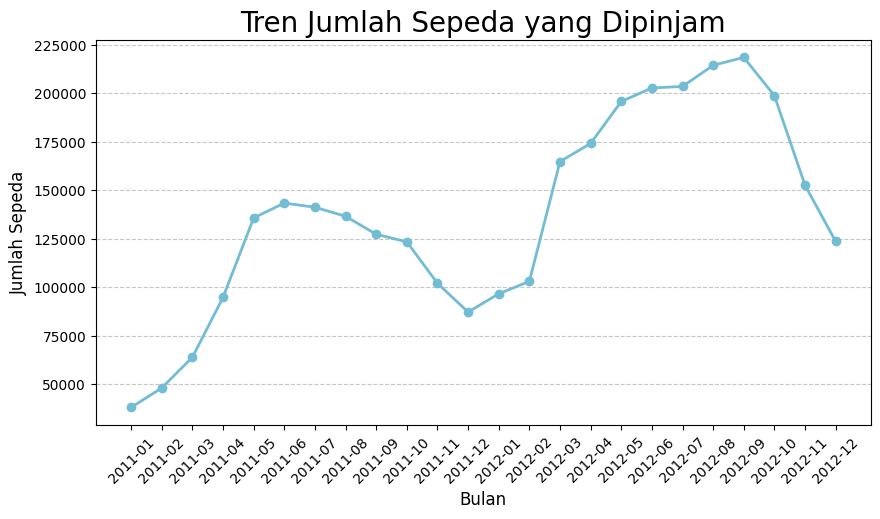

In [267]:
# Mengelompokkan data berdasarkan bulan dan menghitung total peminjaman
monthly = day.groupby(day["dteday"].dt.to_period("M"))["cnt"].sum().reset_index()
monthly["dteday"] = monthly["dteday"].astype(str)

# Membuat line chart
plt.figure(figsize=(10,5))
plt.plot(
    monthly["dteday"], 
    monthly["cnt"], 
    marker='o', 
    linewidth=2, 
    color="#72BCD4"
)

# Menambahkan Keterangan
plt.title("Tren Jumlah Sepeda yang Dipinjam", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Sepeda", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

**Insight:**
- Peminjaman sepeda tertinggi terjadi saat cuaca cerah/sedikit berawan, menurun saat kabut/berawan, dan turun drastis saat hujan atau salju.

- Semakin tinggi suhu, jumlah peminjaman meningkat, tetapi pertumbuhan melambat pada suhu yang sangat tinggi.

- Tren jumlah sepeda yang dipinjam mengalami peningkatan dan penurunan pada bulan tertentu.

## Analisis Lanjutan (Opsional)

### Mengelompokkan hari berdasarkan tingkat peminjaman sepeda (rendah, sedang, tinggi) menggunakan Clustering dengan metode Binning untuk menganalisis distribusi peminjaman sepeda berdasarkan kategori jumlah peminjam

In [ ]:
# Menentukan jumlah bin untuk kategori peminjaman sepeda
# Membagi menjadi 3 kategori: rendah, sedang, tinggi
bins = [0, 3000, 6000, np.inf] # Menentukan batas-batas untuk setiap kategori
labels = ['Rendah', 'Sedang', 'Tinggi']

# Membuat kolom baru berdasarkan binning
day['category'] = pd.cut(day['cnt'], bins=bins, labels=labels, include_lowest=True)

# Menampilkan jumlah hari dalam setiap kategori
category_counts = day['category'].value_counts()
category_counts

category
Sedang    379
Tinggi    180
Rendah    172
Name: count, dtype: int64

C:\Users\victus\AppData\Local\Temp\ipykernel_13052\2553870955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day['category'], palette='pastel')


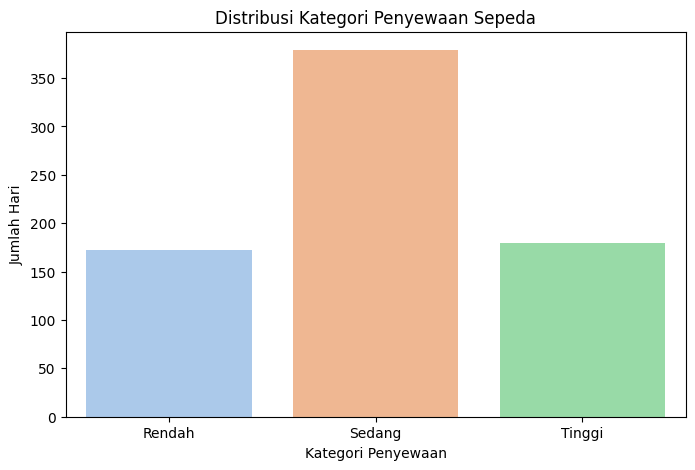

In [ ]:
# Barchart distribusi kategori penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.countplot(x=day['category'], palette='pastel')
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.show()

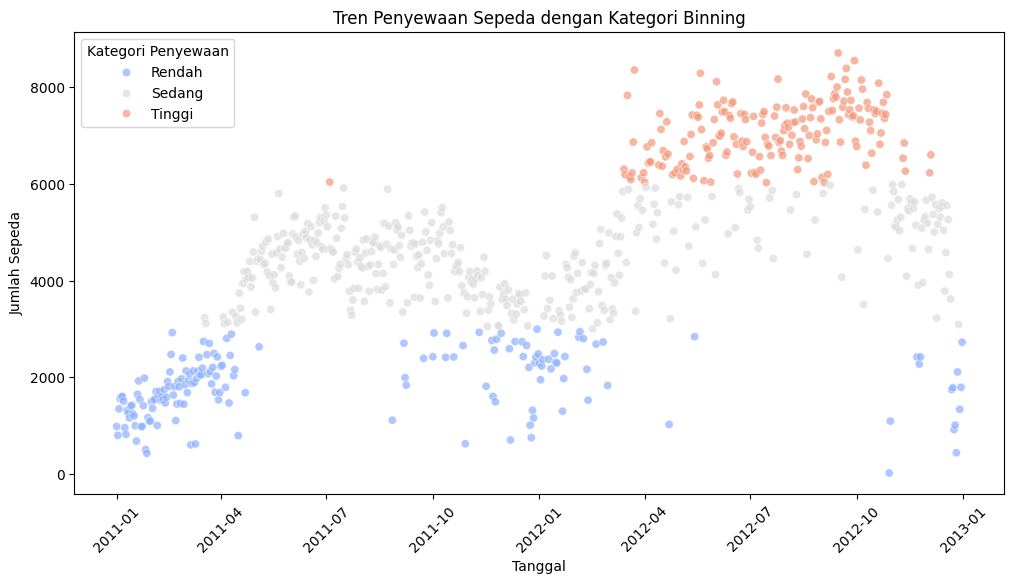

In [270]:
# Menampilkan tren penyewaan sepeda berdasarkan kategori binning
plt.figure(figsize=(12, 6))
sns.scatterplot(x=day['dteday'], y=day['cnt'], hue=day['category'], palette='coolwarm', alpha=0.7)
plt.title("Tren Penyewaan Sepeda dengan Kategori Binning")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Sepeda")
plt.xticks(rotation=45)
plt.legend(title="Kategori Penyewaan")
plt.show()

**Insight:**
- Kategori "Rendah" (biru) lebih banyak terjadi pada awal tahun (Januari-Maret), sementara "Tinggi" (merah) muncul pada pertengahan tahun (April-September). "Sedang" (abu-abu) terlihat pada peralihan musim (Oktober-Desember).


## Conclusion

- Conclution pertanyaan 1 (Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang dipinjam?): <br>
Kondisi cuaca memiliki pengaruh yang signifikan pada jumlah sepeda yang dipinjam. Peminjaman tertinggi terjadi saat cuaca cerah/sedikit berawan, menurun saat kabut/berawan, dan turun drastis saat hujan atau salju. Hal ini menunjukkan bahwa pengguna lebih memilih bersepeda dalam kondisi cuaca yang baik.

- Conclution pertanyaan 2 (Bagaimana hubungan antara suhu dengan jumlah sepeda yang dipinjam?): <br>
Terdapat hubungan antara suhu dengan jumlah sepeda yang dipinjam. Semakin tinggi suhu, jumlah peminjaman cenderung meningkat, menunjukkan korelasi positif antara suhu dan penyewaan sepeda. Namun, pada suhu yang sangat tinggi, pertumbuhan jumlah peminjaman mulai melambat.

- Conclution pertanyaan 3 (Bagaimana perkembangan tren jumlah sepeda yang dipinjam?): <br>
Perkembangan tren jumlah sepeda yang dipinjam mengalami peningkatan dan penurunan. Peminjaman meningkat signifikan pada Maret - Mei (musim semi) karena suhu mulai menghangat setelah musim dingin, membuat kondisi lebih nyaman untuk bersepeda. Puncak terjadi pada Juni - Agustus (musim panas) karena cuaca stabil, dan aktivitas luar ruangan meningkat. Jumlah peminjaman mulai menurun pada September - November (musim gugur) karena suhu mulai turun dan curah hujan meningkat. Peminjaman turun drastis pada Desember - Februari (musim dingin) karena suhu dingin dan kemungkinan salju.